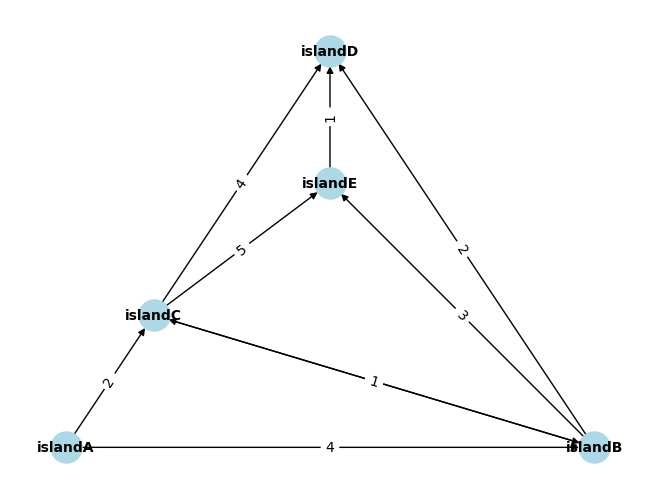

In [11]:
# Create a directed graph with the weights from one "island" to another just for visualization
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("islandA")
G.add_node("islandB")
G.add_node("islandC")
G.add_node("islandD")
G.add_node("islandE")

# Add weighted edges
edges = [
  ("islandA", "islandB", 4), ("islandA", "islandC", 2),
  ("islandB", "islandC", 3), ("islandB", "islandE", 3), ("islandB", "islandD", 2),
  ("islandC", "islandB", 1), ("islandC", "islandD", 4), ("islandC", "islandE", 5),
  ("islandE", "islandD", 1),
]
""""
'islandA': [(4, 'islandB'), (2, 'islandC')],
        'islandB': [(3, 'islandC'), (3, 'islandE'), (2, 'islandD')],
        'islandC': [(1, 'islandB'), (4, 'islandD'), (5, 'islandE')],
        'islandD': [],
        'islandE': [(1, 'islandD')]
"""""
G.add_weighted_edges_from(edges)

# Draw the graph
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [12]:
import heapq

infinity = float("inf")

# Generate a simple graph that represents a simple sea of islands
def make_graph():
    # dictionary with keys that are the island that we are leaving from and tuples that contain the island we are traveling to and the time needed.
    # tuple = (cost, to_node)
    return {
        'islandA': [(4, 'islandB'), (2, 'islandC')],
        'islandB': [(3, 'islandC'), (3, 'islandE'), (2, 'islandD')],
        'islandC': [(1, 'islandB'), (4, 'islandD'), (5, 'islandE')],
        'islandD': [],
        'islandE': [(1, 'islandD')],
    }

# Dijkstra's algorithm implemented using a heap
# Time complexity: O(E + V log V + V^2)
# Source https://www.youtube.com/watch?v=_lHSawdgXpI
# Modified to return the number of nodes in the path to each node and the path to each node
def dijkstras_heap(G, start='islandA'):
    shortest_paths = {}
    previous_nodes = {}
    visited = set()
    heap = []

    # Start each node with the distance from the source to infinity since we don't know the 
    for node in G.keys():
        shortest_paths[node] = infinity
        previous_nodes[node] = None
    # Except for the starting node, since the distance from the starting node to itself is 0
    shortest_paths[start] = 0
    # Add starting node to the set of visited nodes 
    visited.add(start)

    # Add the starting node to the heap-queue
    heapq.heappush(heap, (0, start))

    # While the heap is not empty
    while heap:
        # Remove the current node from the min heap and add it to the list of nodes we visited
        (distance, node) = heapq.heappop(heap)
        visited.add(node)
        
        # For each outgoing edge in the graph visit the ending node and see if we can find a better path to said node
        for edge in G[node]:
            cost, to_node = edge
            # Update the path to the node if we have found a shorter path
            if (to_node not in visited) and (distance + cost < shortest_paths[to_node]):
                shortest_paths[to_node] = distance + cost
                previous_nodes[to_node] = node
                heapq.heappush(heap, (shortest_paths[to_node], to_node))

    # Calculate the number of nodes in the paths
    path_lengths = {node: 0 for node in G.keys()}
    for node in G.keys():
        if shortest_paths[node] != infinity:
            current = node
            while current is not None:
                path_lengths[node] += 1
                current = previous_nodes[current]
    # Reconstruct the path to each node
    paths = {}
    for node in G.keys():
        if shortest_paths[node] != infinity:
            path = []
            current = node
            while current is not None:
                path.append(current)
                current = previous_nodes[current]
            paths[node] = path[::-1]  # Reverse the path to get the correct order
    # Return the dictionary containing the shortest path to all other nodes starting from the origin
    return shortest_paths, path_lengths, paths

In [21]:
import math

# Find the number of times each island is visited to reach all islands
G = make_graph()
start = 'islandA'
# Apply our algorithm to get our data
shortest_paths, path_lengths, paths = dijkstras_heap(G, start)
# Set canoe capacity to a reasonable number
canoe_capacity = 30
def create_map_resources():
    # Create a map of resources wanted on each island
    return {
        'islandB': 100,
        'islandC': 150,
        'islandD': 20,
        'islandE': 50,
    }
    
def calculate_total_canoes_needed():
    # Calculate the total number of canoes needed to visit all islands
    resources = create_map_resources()
    # Sort the resources by longest path to shortest path so we start calculating the path of those with the longest path first
    sorted_resources = sorted(resources.keys(), key=lambda island: path_lengths[island], reverse=True)
    canoe_dict = {island: 0 for island in resources.keys()}
    for island in sorted_resources:
        while resources[island] > 0:
            for path_island in paths[island]:
                if (path_island in resources) and (resources[island] > 0):
                    resources[path_island] -= math.ceil(canoe_capacity / (path_lengths[island] - 1)) # -1 to remove the starting island
            canoe_dict[island] += 1
    return canoe_dict


canoes = calculate_total_canoes_needed()

resources = create_map_resources()
for island, resource in resources.items():
    print(f"Island: {island}, Resource: {island}, Canoes needed that end at {island}: {canoes[island]}")


Island: islandB, Resource: islandB, Canoes needed that end at islandB: 2
Island: islandC, Resource: islandC, Canoes needed that end at islandC: 2
Island: islandD, Resource: islandD, Canoes needed that end at islandD: 2
Island: islandE, Resource: islandE, Canoes needed that end at islandE: 5
